<a href="https://colab.research.google.com/github/anacarmona1/HDS-5210-Ana/blob/main/Final/HDS5210_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Relationship Between Mental Illness Rates, Educational Attainment and Psychiatric Care Quality Across the United States

I used the Mental Health Statistics by State data from https://worldpopulationreview.com/state-rankings/mental-health-statistics-by-state, educational attainment data by state https://www.census.gov/topics/education/educational-attainment.html, and the Inpatient Psychiatric Facility Quality Measure Data - by State https://data.cms.gov/provider-data/dataset/dc76-gh7x#data-table

I cleaed the data, merged it and pivoted some of it, I created a new csv file with all the data, I then created a composite quality score using 3 variables available in the Inpatient Psychiatric Facility Quality Measure Data - by State, this was to meassure the quality of care depending on the readmission rates by hospitals, follow up care and medication.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import doctest


# Data Exploration and transformation
In this section, I'm exploring the different datasets I'll be working with, cleaning the data, organizing it better to then join them together. Starting by reading all my datasets, creating a csv file with FIP codes and State initials then joining the Mental Health JSON file with Quality of Care CSV file and then joining them all together with the education CSV file and states_fips_codes CSV I just created.

Data was then transoformed, renaming columns for better redability and use and dropping duplicates.

In [39]:
pd.read_csv ("qualityofcare.csv")
quality = pd.read_csv ("qualityofcare.csv")
quality.head()

,State,HBIPS-2 Measure Description,S HBIPS-2 Overall Rate Per 1000,S HBIPS-2 Overall Num,S HBIPS-2 Overall Den,HBIPS-3 Measure Description,S HBIPS-3 Overall Rate Per 1000,S HBIPS-3 Overall Num,S HBIPS-3 Overall Den,HBIPS-5 Measure Description,...,READM-30-IPF Start Date,READM-30-IPF End Date,IMM-2 Measure Description,S IMM-2 %,Flu Season Start Date,Flu Season End Date,IPFQR-HCP COVID-19 Measure Description,IPFQR-HCP COVID-19 %,IPFQR-HCP COVID-19 Start Date,IPFQR-HCP COVID-19 End Date
0,AK,Hours of physical-restraint use,0.18,208.85,47204,Hours of seclusion use,0.57,648.23,47204,Patients discharged on multiple antipsychotic ...,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),52,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,31.0,10/01/2023,12/31/2023
1,AL,Hours of physical-restraint use,0.16,1356.32,355259,Hours of seclusion use,0.28,2417.27,355259,Patients discharged on multiple antipsychotic ...,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),85,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,3.2,10/01/2023,12/31/2023
2,AR,Hours of physical-restraint use,0.10,722.26,301370,Hours of seclusion use,0.29,2067.37,301370,Patients discharged on multiple antipsychotic ...,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),78,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,29.0,10/01/2023,12/31/2023
3,AZ,Hours of physical-restraint use,0.36,5921.42,689090,Hours of seclusion use,0.17,2855.43,689090,Patients discharged on multiple antipsychotic ...,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),72,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,12.0,10/01/2023,12/31/2023
4,CA,Hours of physical-restraint use,0.53,24678.81,1957115,Hours of seclusion use,0.37,17298.00,1957115,Patients discharged on multiple antipsychotic ...,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),83,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,26.7,10/01/2023,12/31/2023


In [40]:
pd.read_json("mh.json")
mental_health = pd.read_json("mh.json")
mental_health.head()


,state,MentalHealthStatisticsRatesOfMentalIllness,MentalHealthStatisticsAdultsWithAnxietyOrDepresion,MentalHealthStatisticsAdultsWithSevereMentalIllness,MentalHealthStatisticsOverallMentalHealthStandingYouthAdults
0,Alabama,21.24,38.2,5.6,44.0
1,Alaska,22.20,31.6,5.9,46.0
2,Arizona,23.89,33.2,5.6,48.0
3,Arkansas,22.61,30.6,5.5,38.0
4,California,20.49,32.6,4.5,23.0


In [41]:
pd.read_csv("education.csv")
education = pd.read_csv("education.csv")
education.head()

,FIPS code,state,MostEducatedStatesTotalBSDegreeOrHigher,MostEducatedStatesAssociatesDegree,MostEducatedStatesBachelorsDegree,MostEducatedStatesGraduateOrProfessionalDegree,MostEducatedStatesHSGradOrEquivalent,MostEducatedStatesLessThanHighSchoolGraduate
0,1000,Alabama,26.2,8.7,16.3,9.9,30.3,13.1
1,2000,Alaska,30.0,8.7,18.7,11.3,28.4,6.9
2,4000,Arizona,30.3,8.9,18.8,11.5,23.8,12.1
3,5000,Arkansas,23.8,7.5,15.2,8.6,33.9,12.8
4,6000,California,34.7,8.0,21.6,13.1,20.4,16.1


In [42]:
#Creating a csv file with fips code and state names to join with each dataset
state_names_to_initials = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

mental_health['State'] = mental_health['state'].map(state_names_to_initials)
merged_df = pd.merge(education, mental_health[['State', 'state']],
left_on='state', right_on='state', how='inner')
fips_df = pd.merge(merged_df, quality[['State']], on='State', how='inner')
fips_df = fips_df[['FIPS code', 'State']]
fips_df.to_csv('states_fips_codes.csv', index=False)



In [43]:
merged_df = pd.merge(mental_health, quality, on='State', how='inner')
merged_df.head()

,state,MentalHealthStatisticsRatesOfMentalIllness,MentalHealthStatisticsAdultsWithAnxietyOrDepresion,MentalHealthStatisticsAdultsWithSevereMentalIllness,MentalHealthStatisticsOverallMentalHealthStandingYouthAdults,State,HBIPS-2 Measure Description,S HBIPS-2 Overall Rate Per 1000,S HBIPS-2 Overall Num,S HBIPS-2 Overall Den,...,READM-30-IPF Start Date,READM-30-IPF End Date,IMM-2 Measure Description,S IMM-2 %,Flu Season Start Date,Flu Season End Date,IPFQR-HCP COVID-19 Measure Description,IPFQR-HCP COVID-19 %,IPFQR-HCP COVID-19 Start Date,IPFQR-HCP COVID-19 End Date
0,Alabama,21.24,38.2,5.6,44.0,AL,Hours of physical-restraint use,0.16,1356.32,355259,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),85,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,3.2,10/01/2023,12/31/2023
1,Alaska,22.20,31.6,5.9,46.0,AK,Hours of physical-restraint use,0.18,208.85,47204,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),52,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,31.0,10/01/2023,12/31/2023
2,Arizona,23.89,33.2,5.6,48.0,AZ,Hours of physical-restraint use,0.36,5921.42,689090,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),72,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,12.0,10/01/2023,12/31/2023
3,Arkansas,22.61,30.6,5.5,38.0,AR,Hours of physical-restraint use,0.10,722.26,301370,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),78,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,29.0,10/01/2023,12/31/2023
4,California,20.49,32.6,4.5,23.0,CA,Hours of physical-restraint use,0.53,24678.81,1957115,...,07/01/2020,06/30/2022,Influenza immunization (IPFQR-IMM-2),83,10/01/2022,03/31/2023,Percentage of healthcare personnel who are up ...,26.7,10/01/2023,12/31/2023


In [44]:
merged_df_education = pd.merge(merged_df, education, on='state', how='inner')
merged_df_education.head()

,state,MentalHealthStatisticsRatesOfMentalIllness,MentalHealthStatisticsAdultsWithAnxietyOrDepresion,MentalHealthStatisticsAdultsWithSevereMentalIllness,MentalHealthStatisticsOverallMentalHealthStandingYouthAdults,State,HBIPS-2 Measure Description,S HBIPS-2 Overall Rate Per 1000,S HBIPS-2 Overall Num,S HBIPS-2 Overall Den,...,IPFQR-HCP COVID-19 %,IPFQR-HCP COVID-19 Start Date,IPFQR-HCP COVID-19 End Date,FIPS code,MostEducatedStatesTotalBSDegreeOrHigher,MostEducatedStatesAssociatesDegree,MostEducatedStatesBachelorsDegree,MostEducatedStatesGraduateOrProfessionalDegree,MostEducatedStatesHSGradOrEquivalent,MostEducatedStatesLessThanHighSchoolGraduate
0,Alabama,21.24,38.2,5.6,44.0,AL,Hours of physical-restraint use,0.16,1356.32,355259,...,3.2,10/01/2023,12/31/2023,1000,26.2,8.7,16.3,9.9,30.3,13.1
1,Alaska,22.20,31.6,5.9,46.0,AK,Hours of physical-restraint use,0.18,208.85,47204,...,31.0,10/01/2023,12/31/2023,2000,30.0,8.7,18.7,11.3,28.4,6.9
2,Arizona,23.89,33.2,5.6,48.0,AZ,Hours of physical-restraint use,0.36,5921.42,689090,...,12.0,10/01/2023,12/31/2023,4000,30.3,8.9,18.8,11.5,23.8,12.1
3,Arkansas,22.61,30.6,5.5,38.0,AR,Hours of physical-restraint use,0.10,722.26,301370,...,29.0,10/01/2023,12/31/2023,5000,23.8,7.5,15.2,8.6,33.9,12.8
4,California,20.49,32.6,4.5,23.0,CA,Hours of physical-restraint use,0.53,24678.81,1957115,...,26.7,10/01/2023,12/31/2023,6000,34.7,8.0,21.6,13.1,20.4,16.1


In [45]:
merged_df_by_state = pd.merge(merged_df_education, fips_df, on='State', how='inner')
columns_order = (['FIPS code_y'] +
                 [col for col in merged_df_by_state.columns if col != 'FIPS code_y'])
merged_df_by_state = merged_df_by_state[columns_order]
#Changing column names to make them easier to read
merged_df_by_state.rename(columns={'FIPS code_y': 'FIPS Code'}, inplace=True)
merged_df_by_state.rename(columns= {'MentalHealthStatisticsRatesOfMentalIllness': 'Rates of Mental Illness'}, inplace=True)
merged_df_by_state.rename(columns= {'MentalHealthStatisticsAdultsWithAnxietyOrDepresion': 'Rates of Anxiety and Depression'}, inplace=True)
merged_df_by_state.rename(columns= {'MentalHealthStatisticsAdultsWithSevereMentalIllness': 'Rates of Severe Mental Illness'}, inplace=True)
merged_df_by_state.rename(columns= {'MentalHealthStatisticsOverallMentalHealthStandingYouthAdults': 'Overall Mental Health Young Adults'}, inplace=True)
merged_df_by_state.rename(columns= {'MostEducatedStatesTotalBSDegreeOrHigher': 'Most Educated BS or Higher'}, inplace=True)
merged_df_by_state.rename(columns= {'MostEducatedStatesAssociatesDegree': 'Most Educated Associate or Higher'}, inplace=True)
merged_df_by_state.rename(columns= {'MostEducatedStatesBachelorsDegree': 'Most Educated Bachelors'}, inplace=True)
merged_df_by_state.rename(columns= {'MostEducatedStatesGraduateOrProfessionalDegree': 'Most Educated Masters'}, inplace=True)
merged_df_by_state.rename(columns= {'MostEducatedStatesHSGradOrEquivalent': 'Most Educated High School'}, inplace=True)
merged_df_by_state.rename(columns= {'MostEducatedStatesLessThanHighSchoolGraduate': 'Most Educated Less than HS'}, inplace=True)
merged_df_by_state.head()


,FIPS Code,state,Rates of Mental Illness,Rates of Anxiety and Depression,Rates of Severe Mental Illness,Overall Mental Health Young Adults,State,HBIPS-2 Measure Description,S HBIPS-2 Overall Rate Per 1000,S HBIPS-2 Overall Num,...,IPFQR-HCP COVID-19 %,IPFQR-HCP COVID-19 Start Date,IPFQR-HCP COVID-19 End Date,FIPS code_x,Most Educated BS or Higher,Most Educated Associate or Higher,Most Educated Bachelors,Most Educated Masters,Most Educated High School,Most Educated Less than HS
0,1000,Alabama,21.24,38.2,5.6,44.0,AL,Hours of physical-restraint use,0.16,1356.32,...,3.2,10/01/2023,12/31/2023,1000,26.2,8.7,16.3,9.9,30.3,13.1
1,2000,Alaska,22.20,31.6,5.9,46.0,AK,Hours of physical-restraint use,0.18,208.85,...,31.0,10/01/2023,12/31/2023,2000,30.0,8.7,18.7,11.3,28.4,6.9
2,4000,Arizona,23.89,33.2,5.6,48.0,AZ,Hours of physical-restraint use,0.36,5921.42,...,12.0,10/01/2023,12/31/2023,4000,30.3,8.9,18.8,11.5,23.8,12.1
3,5000,Arkansas,22.61,30.6,5.5,38.0,AR,Hours of physical-restraint use,0.10,722.26,...,29.0,10/01/2023,12/31/2023,5000,23.8,7.5,15.2,8.6,33.9,12.8
4,6000,California,20.49,32.6,4.5,23.0,CA,Hours of physical-restraint use,0.53,24678.81,...,26.7,10/01/2023,12/31/2023,6000,34.7,8.0,21.6,13.1,20.4,16.1


In [46]:
merged_df_by_state.drop(columns=['State'], inplace=True)
merged_df_by_state.drop(columns=['FIPS code_x'], inplace=True)
merged_df_by_state.head()

,FIPS Code,state,Rates of Mental Illness,Rates of Anxiety and Depression,Rates of Severe Mental Illness,Overall Mental Health Young Adults,HBIPS-2 Measure Description,S HBIPS-2 Overall Rate Per 1000,S HBIPS-2 Overall Num,S HBIPS-2 Overall Den,...,IPFQR-HCP COVID-19 Measure Description,IPFQR-HCP COVID-19 %,IPFQR-HCP COVID-19 Start Date,IPFQR-HCP COVID-19 End Date,Most Educated BS or Higher,Most Educated Associate or Higher,Most Educated Bachelors,Most Educated Masters,Most Educated High School,Most Educated Less than HS
0,1000,Alabama,21.24,38.2,5.6,44.0,Hours of physical-restraint use,0.16,1356.32,355259,...,Percentage of healthcare personnel who are up ...,3.2,10/01/2023,12/31/2023,26.2,8.7,16.3,9.9,30.3,13.1
1,2000,Alaska,22.20,31.6,5.9,46.0,Hours of physical-restraint use,0.18,208.85,47204,...,Percentage of healthcare personnel who are up ...,31.0,10/01/2023,12/31/2023,30.0,8.7,18.7,11.3,28.4,6.9
2,4000,Arizona,23.89,33.2,5.6,48.0,Hours of physical-restraint use,0.36,5921.42,689090,...,Percentage of healthcare personnel who are up ...,12.0,10/01/2023,12/31/2023,30.3,8.9,18.8,11.5,23.8,12.1
3,5000,Arkansas,22.61,30.6,5.5,38.0,Hours of physical-restraint use,0.10,722.26,301370,...,Percentage of healthcare personnel who are up ...,29.0,10/01/2023,12/31/2023,23.8,7.5,15.2,8.6,33.9,12.8
4,6000,California,20.49,32.6,4.5,23.0,Hours of physical-restraint use,0.53,24678.81,1957115,...,Percentage of healthcare personnel who are up ...,26.7,10/01/2023,12/31/2023,34.7,8.0,21.6,13.1,20.4,16.1


In [47]:
#S HBIPS-2 Overall Num = hours of physical restraint
#S HBIPS-3 Overall Num = Hours of seclusion use
aggregated_data = quality.groupby(['State', 'Start Date'])[['S HBIPS-2 Overall Num', 'S HBIPS-3 Overall Num']].mean().reset_index()
aggregated_data.head()

,State,Start Date,S HBIPS-2 Overall Num,S HBIPS-3 Overall Num
0,AK,01/01/2022,208.85,648.23
1,AL,01/01/2022,1356.32,2417.27
2,AR,01/01/2022,722.26,2067.37
3,AZ,01/01/2022,5921.42,2855.43
4,CA,01/01/2022,24678.81,17298.00


# Functions
In this section I'm creating a composite score function that will calculate the quality of psychiatric care, the score will be from 0-10, 0 being the worst quality of care and 10 being the best.

The variables used for this score are:

FAPH (Percent of patients receiving follow-up care within 30 days (FAPH-30) S FAPH-30 %) which will be composed of 4 points, 0.0 - 60.0 = 2 points, 61.0- 75.0 = 3 points, 76.0 - 100 = 4 points.

Readmission rate (S READM-30-IPF # IPFs Worse) this variable meassures the readmission rate to any hospital within 30 days of discharge from the inpatient psychiatric facility (READM-30-IPF), the higher readmission the lower the score and this will be composed of 4 points,
0-3 = 4 points, 4-6 = 3 points, 7-9 = 2 points and  > 10 = 1 point.


Medication Continuation Following Inpatient Psychiatric Discharge (S MedCont %) this variable will compute 2 points, 0-50% = 0 points 51-70% = 1 point and over 71% = 2 points  

I created 4 different functions to come up with a composite quality score for quality of psychiatric care per state.




In [48]:
def faph_score(faph):
  '''Computes the FAPH score for a given quality dictionary
where 0.0 - 60.0 = 2 points
61.0- 75.0 = 3 points
76.0 - 100 = 4 points

>>> faph_score(60.9)
2
>>> faph_score(74.4)
3
>>> faph_score(81.3)
4
'''
  if 0.0 <= faph <= 60.9:
        return 2
  elif 61.0 < faph <= 75.9:
        return 3
  elif 76.0 < faph <= 100.0:
        return 4
  else:
        return None

In [49]:
doctest.run_docstring_examples(faph_score, globals(), verbose=True)

Finding tests in NoName
Trying:
    faph_score(60.9)
Expecting:
    2
ok
Trying:
    faph_score(74.4)
Expecting:
    3
ok
Trying:
    faph_score(81.3)
Expecting:
    4
ok


In [50]:
assert faph_score(48.6) == 2
assert faph_score(75.9) == 3
assert faph_score(81.3) == 4

In [51]:
def readmission_rate_score(readmission_rate):
    ''' computes readmission rate scores
the higher readmission the lower the score and this will be composed of 4 points,
0-3 = 4 points, 4-6 = 3 points, 7-9 = 2 points and  > 10 = 1 point.
>>> readmission_rate_score(0)
4
>>> readmission_rate_score(2)
4
>>> readmission_rate_score(5)
3
>>> readmission_rate_score(9)
2
>>> readmission_rate_score(10)
1
'''
    if 0 <= readmission_rate <= 3:
        return 4
    elif 4 <= readmission_rate <= 6:
        return 3
    elif 7 <= readmission_rate <= 9:
        return 2
    elif readmission_rate >= 10:
        return 1
    else:
        return None

In [52]:
assert readmission_rate_score(0) == 4
assert readmission_rate_score(5) == 3
assert readmission_rate_score(9) == 2
assert readmission_rate_score(10) == 1

In [53]:
doctest.run_docstring_examples(readmission_rate_score, globals(), verbose=True)

Finding tests in NoName
Trying:
    readmission_rate_score(0)
Expecting:
    4
ok
Trying:
    readmission_rate_score(2)
Expecting:
    4
ok
Trying:
    readmission_rate_score(5)
Expecting:
    3
ok
Trying:
    readmission_rate_score(9)
Expecting:
    2
ok
Trying:
    readmission_rate_score(10)
Expecting:
    1
ok


In [54]:
def medication_continuation_score(medication_continuation):
    ''' computes medication continuation, Following Inpatient Psychiatric Discharge (S MedCont %)
 0-50% = 0 points 51-70% = 1 point and over 71% = 2 points
>>> medication_continuation_score(50.0)
0
>>> medication_continuation_score(60.0)
1
>>> medication_continuation_score(75.0)
2
'''

    if 0.0 <= medication_continuation <= 50.0:
        return 0
    elif 50.0 < medication_continuation <= 70.0:
        return 1
    elif 70.0 < medication_continuation <= 100.0:
        return 2
    else:
        return None

In [55]:
doctest.run_docstring_examples(medication_continuation_score, globals(), verbose=True)

Finding tests in NoName
Trying:
    medication_continuation_score(50.0)
Expecting:
    0
ok
Trying:
    medication_continuation_score(60.0)
Expecting:
    1
ok
Trying:
    medication_continuation_score(75.0)
Expecting:
    2
ok


In [56]:
assert medication_continuation_score(50.0) == 0
assert medication_continuation_score(60.0) == 1
assert medication_continuation_score(75.0) == 2

In [57]:
def composite_quality_score (faph_score, readmission_rate_score, medication_continuation_score):
  ''' computes final composite quality score for psychiatric care, which is a score from 1-10 where 1 is worst quality of care and 10 is best.
>>> composite_quality_score(1, 2, 3)
6
>>> composite_quality_score(4, 3, 2)
9
>>> composite_quality_score(1, 5, 1)
7
'''
  return (faph_score + readmission_rate_score + medication_continuation_score)



In [58]:
assert composite_quality_score(1, 2, 3) == 6
assert composite_quality_score(4, 3, 2) == 9
assert composite_quality_score(1, 5, 1) == 7

In [59]:
merged_df_by_state[['S FAPH-30 %', 'S READM-30-IPF # IPFs Worse', 'S MedCont %']] = merged_df_by_state[
    ['S FAPH-30 %', 'S READM-30-IPF # IPFs Worse', 'S MedCont %']
].apply(pd.to_numeric, errors='coerce')
merged_df_by_state['faph_score'] = merged_df_by_state['S FAPH-30 %'].apply(faph_score)
merged_df_by_state['readmission_rate_score'] = merged_df_by_state['S READM-30-IPF # IPFs Worse'].apply(readmission_rate_score)
merged_df_by_state['medication_continuation_score'] = merged_df_by_state['S MedCont %'].apply(medication_continuation_score)
merged_df_by_state['composite_quality_score'] = (
    merged_df_by_state['faph_score'] +
    merged_df_by_state['readmission_rate_score'] +
    merged_df_by_state['medication_continuation_score']
)

merged_df_by_state.to_csv('final_df_with_scores.csv', index=False)
merged_df_by_state.head()


,FIPS Code,state,Rates of Mental Illness,Rates of Anxiety and Depression,Rates of Severe Mental Illness,Overall Mental Health Young Adults,HBIPS-2 Measure Description,S HBIPS-2 Overall Rate Per 1000,S HBIPS-2 Overall Num,S HBIPS-2 Overall Den,...,Most Educated BS or Higher,Most Educated Associate or Higher,Most Educated Bachelors,Most Educated Masters,Most Educated High School,Most Educated Less than HS,faph_score,readmission_rate_score,medication_continuation_score,composite_quality_score
0,1000,Alabama,21.24,38.2,5.6,44.0,Hours of physical-restraint use,0.16,1356.32,355259,...,26.2,8.7,16.3,9.9,30.3,13.1,2,4,2.0,8.0
1,2000,Alaska,22.20,31.6,5.9,46.0,Hours of physical-restraint use,0.18,208.85,47204,...,30.0,8.7,18.7,11.3,28.4,6.9,2,4,1.0,7.0
2,4000,Arizona,23.89,33.2,5.6,48.0,Hours of physical-restraint use,0.36,5921.42,689090,...,30.3,8.9,18.8,11.5,23.8,12.1,3,4,2.0,9.0
3,5000,Arkansas,22.61,30.6,5.5,38.0,Hours of physical-restraint use,0.10,722.26,301370,...,23.8,7.5,15.2,8.6,33.9,12.8,2,4,2.0,8.0
4,6000,California,20.49,32.6,4.5,23.0,Hours of physical-restraint use,0.53,24678.81,1957115,...,34.7,8.0,21.6,13.1,20.4,16.1,2,2,2.0,6.0


In [60]:
composite_qualily_pivot = merged_df_by_state.groupby(['state', 'composite_quality_score'])[['faph_score', 'readmission_rate_score', 'medication_continuation_score']].mean().reset_index()
composite_qualily_pivot.head()

,state,composite_quality_score,faph_score,readmission_rate_score,medication_continuation_score
0,Alabama,8.0,2.0,4.0,2.0
1,Alaska,7.0,2.0,4.0,1.0
2,Arizona,9.0,3.0,4.0,2.0
3,Arkansas,8.0,2.0,4.0,2.0
4,California,6.0,2.0,2.0,2.0


# Visualizations

Map of the United States using geopandas library, showing us the prevalence of mental health illness by state, where Utah has the highest prevalence.

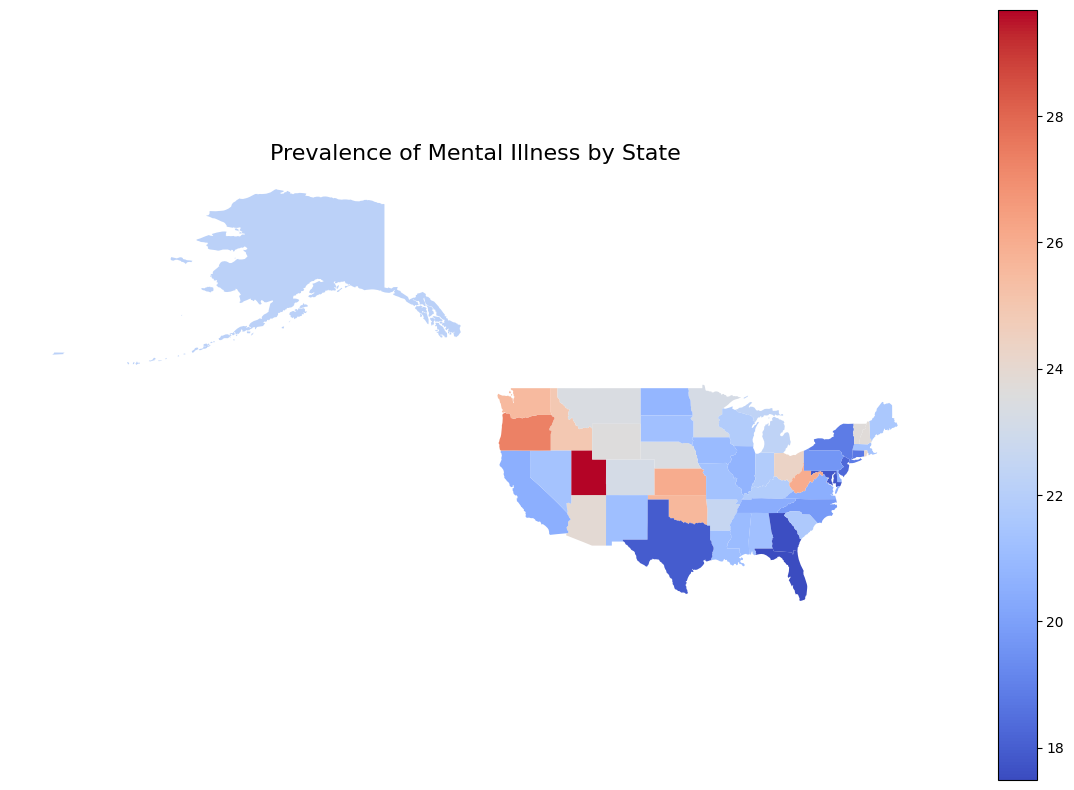

In [61]:
import geopandas as gpd
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
us_states = gpd.read_file(url)
us_states['state'] = us_states['name']
us_states = us_states[~us_states['state'].isin(['Hawaii', 'Puerto Rico'])]
merged_map = us_states.merge(merged_df_by_state, on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_map.plot(
    column='Rates of Mental Illness',
    ax=ax,
    legend=True,
    cmap='coolwarm',
    missing_kwds={
        "color": "lightgrey",
        "label": "No Data"
    }
)
ax.set_title('Prevalence of Mental Illness by State', fontsize=16)
plt.axis('off')
plt.show()



Here's a map of the United States showing the Composite Quality of care score per state, Florida having the lowest score and quality of care yet being one of the states with the most prevalence of mental health illness.

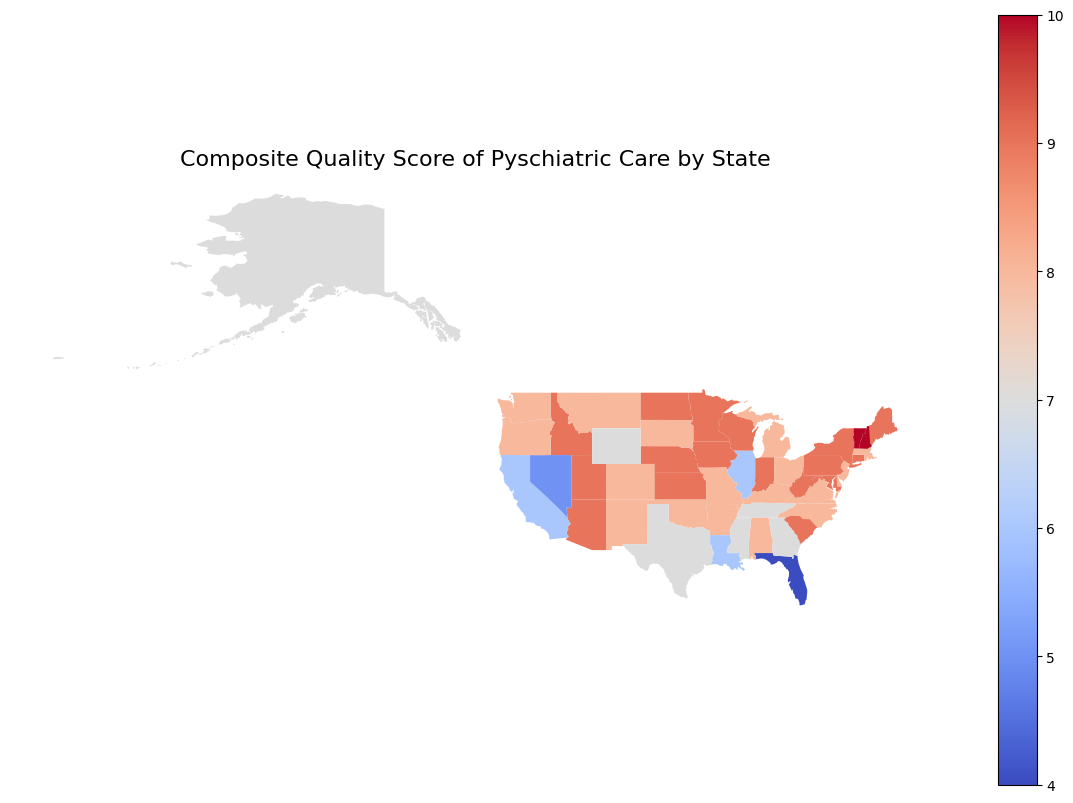

In [62]:
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
us_states = gpd.read_file(url)
us_states['state'] = us_states['name']
us_states = us_states[~us_states['state'].isin(['Hawaii', 'Puerto Rico'])]
merged_map = us_states.merge(merged_df_by_state, on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_map.plot(
    column='composite_quality_score',
    ax=ax,
    legend=True,
    cmap='coolwarm',
    missing_kwds={
        "color": "lightgrey",
        "label": "No Data"
    }
)
ax.set_title('Composite Quality Score of Pyschiatric Care by State', fontsize=16)
plt.axis('off')
plt.show()

Scatter plot showing that there's no relationship between the less than high school educational attainment and prevalence of mental health illness per state.

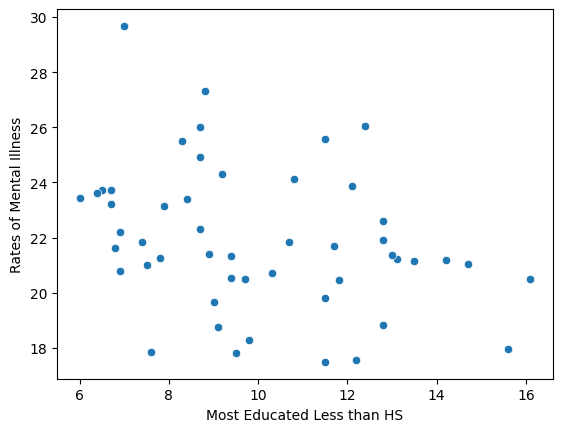

In [63]:
plot = sns.scatterplot(data=merged_df_by_state, x='Most Educated Less than HS', y='Rates of Mental Illness')

Scatter plot showing that there's no relationship between the bachelors educational attainment and prevalence of mental health illness per state.

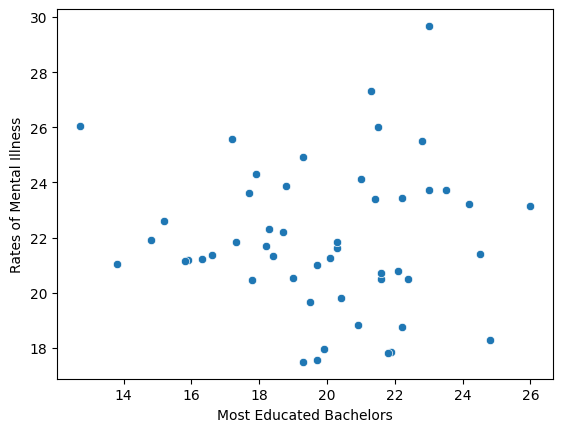

In [64]:
plot = sns.scatterplot(data=merged_df_by_state, x='Most Educated Bachelors', y='Rates of Mental Illness')

Scatter plot showing that there's no relationship between the masters level educational attainment and prevalence of mental health illness per state.

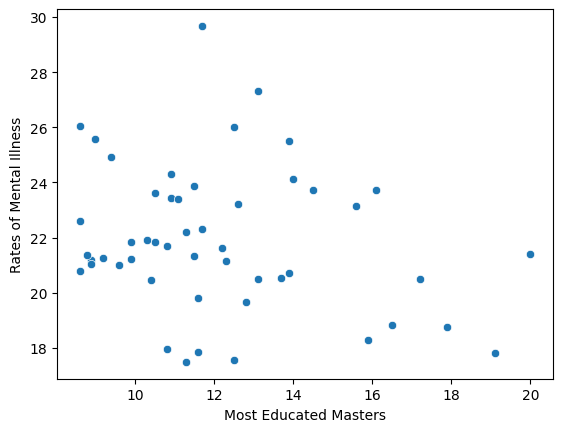

In [65]:
plot = sns.scatterplot(data=merged_df_by_state, x='Most Educated Masters', y='Rates of Mental Illness')

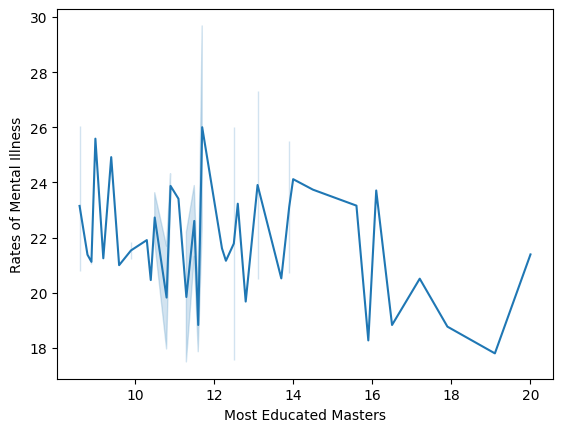

In [66]:
plot = sns.lineplot(data=merged_df_by_state, x='Most Educated Masters', y='Rates of Mental Illness')

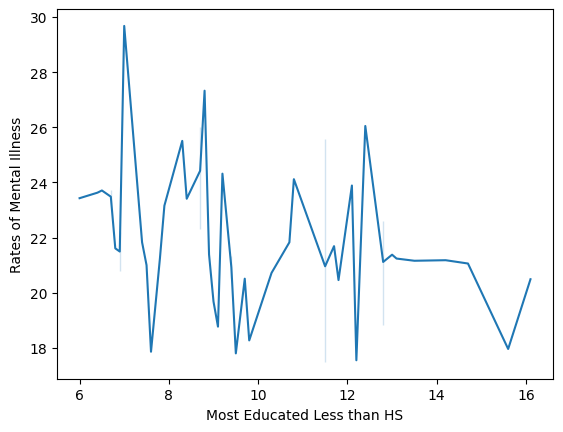

In [67]:
plot = sns.lineplot(data=merged_df_by_state, x= 'Most Educated Less than HS', y='Rates of Mental Illness')

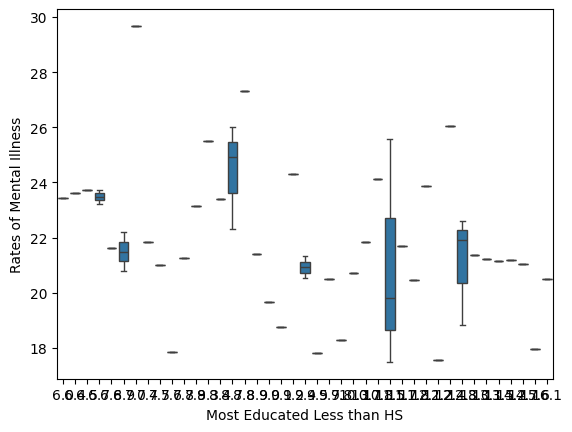

In [68]:
plot = sns.boxplot(data=merged_df_by_state, x='Most Educated Less than HS', y='Rates of Mental Illness')

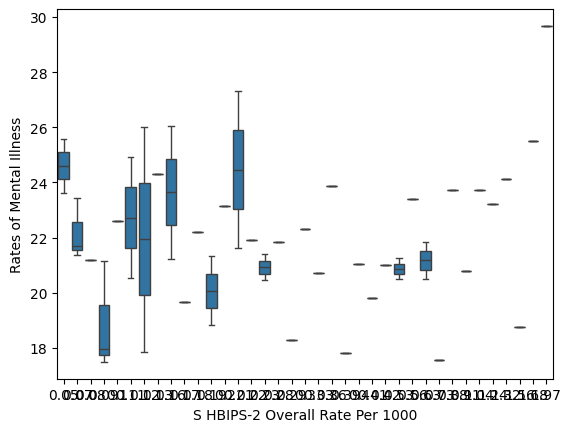

In [69]:
plot = sns.boxplot(data=merged_df_by_state, x='S HBIPS-2 Overall Rate Per 1000', y='Rates of Mental Illness')

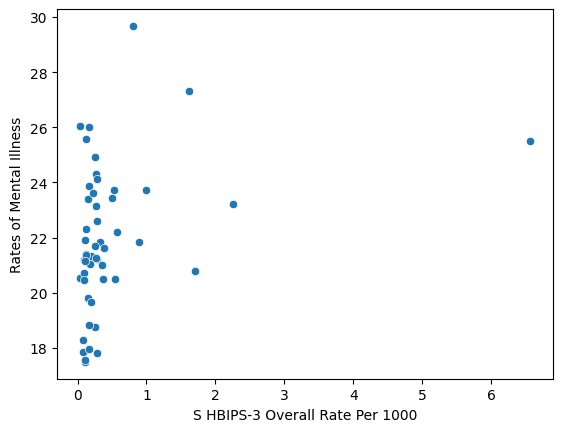

In [70]:
plot = sns.scatterplot(data=merged_df_by_state, x='S HBIPS-3 Overall Rate Per 1000', y='Rates of Mental Illness')

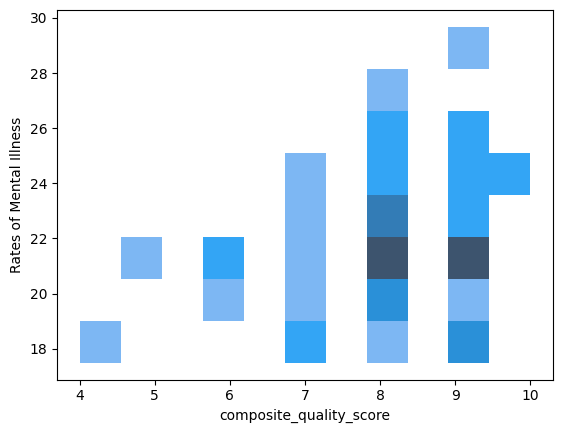

In [71]:
plot = sns.histplot(data = merged_df_by_state, x= 'composite_quality_score', y= 'Rates of Mental Illness')

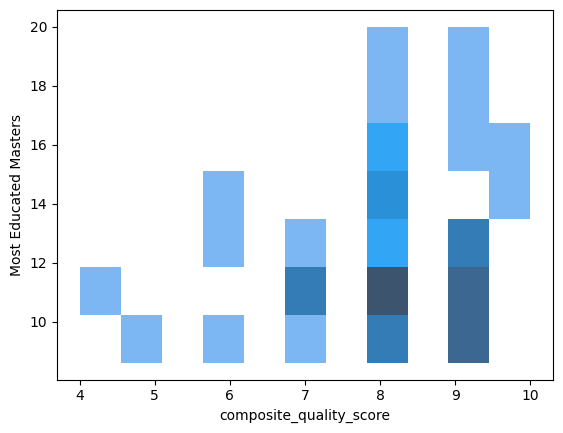

In [72]:
plot = sns.histplot(data= merged_df_by_state, x= 'composite_quality_score', y='Most Educated Masters')

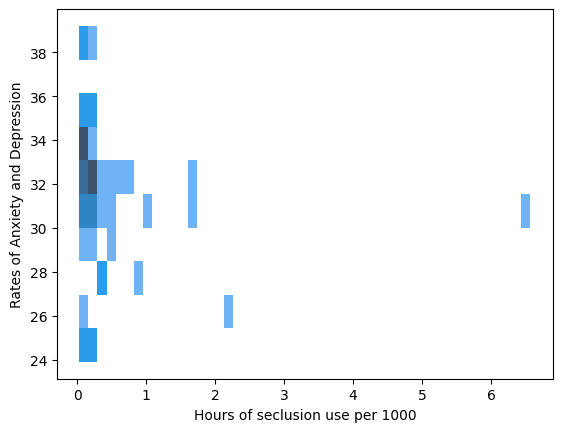

In [73]:
plot = sns.histplot(data=merged_df_by_state, x='S HBIPS-3 Overall Rate Per 1000', y='Rates of Anxiety and Depression')
plot.set_xlabel('Hours of seclusion use per 1000')
plt.show()


<Axes: ylabel='Frequency'>

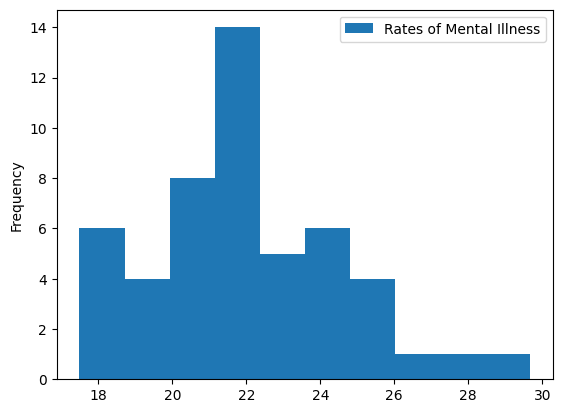

In [74]:
merged_df_by_state.plot(kind='hist', x='S HBIPS-3 Overall Rate Per 1000', y='Rates of Mental Illness')

# Conclusion

After running this program and exploring different variables together from the different datasets obtained, there was no proof of a significant relationship when it comes to mental health statistics and educational attainment or mental health statistics and psychiatric quality of care, however, creating a composite quality of care score showed important information in relation to the quality of psychiatric care offered in each State which I consider could have significant applicabilities in the industry to determine which areas of care need improvement and how to quickly access this information for decision making.

This program could also be further explored and studied to perhaps try to corralate variables in a different way that was not already done during this project.

In conclusion I consider that the overall outcome of this project could have certain applicabilities in the health care industry, specifically in the psychiatry area of medicine, considering that the quality of psychiatric care is one the most important aspects of psychiatric medicine as it can not only prevent individuals from worsening their conditions but also allow them to feel comfortable visiting their specialists when they need it.